In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pickle
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import dataframe_image as dfi
from sklearn.metrics import confusion_matrix


import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib notebook

In [47]:
df = pd.read_csv('../Dataset/slider_features.csv').drop('file_name',axis=1)

In [48]:
scaler = StandardScaler()
df_1 = pd.DataFrame(scaler.fit_transform(df.iloc[:,:-1]),columns = df.columns[:-1])
df_1['class'] = df['class']
df_1

,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,spec_roll_min,spec_roll_mean,rms_mean,flat_mean,flat_max,amp_mean,amp_min,melspec_mean,melspec_std,class
0,0.330403,-0.111409,-0.612230,-0.547201,-0.780598,-0.634709,-1.047566,-0.005438,-0.186318,0.477745,0.136254,-0.550328,-0.253502,-0.086932,-0.791563,-0.798138,-0.443195,-0.309697,0
1,0.705956,-0.150267,-2.034142,-0.515184,-0.993941,-0.711149,-0.811749,-1.166987,-1.233736,-1.431716,-1.290532,-0.492211,-0.934917,-0.942717,-0.574466,-0.391122,-0.424643,-0.534390,0
2,0.489557,-0.290336,0.455827,-0.073744,-0.878037,-0.672929,-1.098553,-0.380285,-0.961878,-0.088021,-0.901947,-0.014322,-0.809844,-0.688188,-0.144908,0.006556,-0.074864,-0.345452,0
3,0.869332,-0.957783,-0.013581,-0.290334,-0.494573,-0.672929,-0.932844,0.588445,-0.126237,0.813669,0.221742,-0.259287,-0.324310,0.353320,-0.423958,0.228802,-0.236818,-0.304734,0
4,0.797117,-0.853169,-0.170294,-0.109574,-1.052019,-0.825809,-1.187781,-0.927016,-1.361076,-0.759868,-1.437317,-0.059727,-0.991090,-0.455432,-0.221353,0.517874,-0.107544,-0.335033,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089,-1.646317,1.963358,-0.831703,-0.055760,-0.403302,-0.176070,0.807103,-0.355850,-0.429871,-0.600747,-0.442208,-0.185129,-0.382877,-0.821247,-0.019637,-0.362810,-0.093600,0.235024,1
4090,-2.158681,2.316368,-0.670230,-0.293480,0.368368,0.702990,0.698755,0.200895,0.209927,-0.441625,0.100268,-0.503777,0.229469,0.738127,-0.216879,-0.756139,-0.325548,0.115031,1
4091,-1.601332,2.131823,-0.830824,-0.552866,0.400806,0.932310,0.756116,0.437705,0.257964,-0.476985,0.220442,-0.756858,0.202141,-0.336263,-0.532846,-1.588571,-0.505483,-0.000577,1
4092,-0.778805,0.995287,-0.634274,-0.897181,2.709773,0.244350,1.023800,0.140987,2.065875,-0.070341,1.730146,-1.247587,4.062741,1.807543,-0.711404,-3.822867,-0.892747,-0.209592,1


<IPython.core.display.Javascript object>


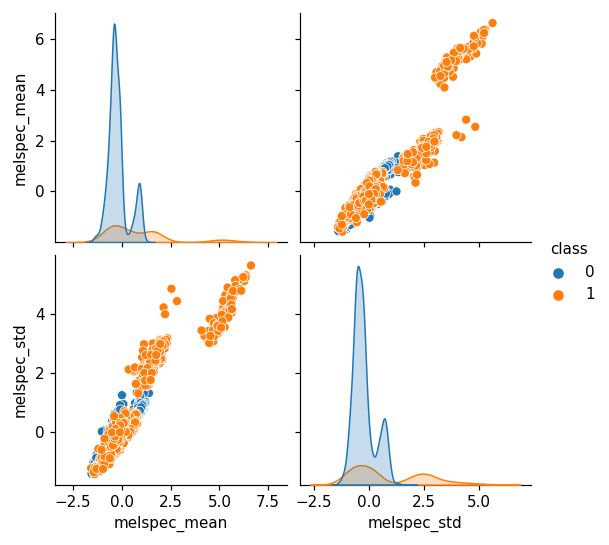

In [49]:
sns.pairplot(df_1.loc[:,[
       'melspec_mean', 'melspec_std', 'class']],hue='class')
plt.savefig('slider_pairplot_melspec_mean_std.jpg')

In [50]:
X = df_1.loc[:,['melspec_mean', 'melspec_std','class']]


<IPython.core.display.Javascript object>


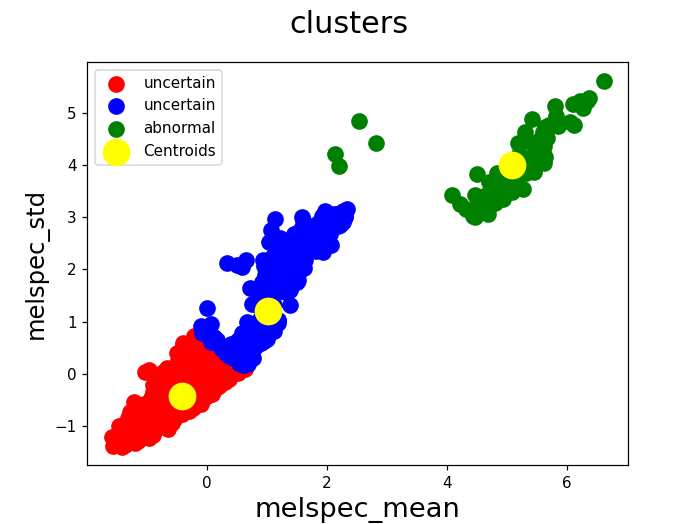

In [64]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X.iloc[:,:-1])
fig = plt.figure()
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100,c='red',label='uncertain')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100,c='blue',label='uncertain')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100,c='green',label='abnormal')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=300,c='yellow',label='Centroids')


fig.suptitle('clusters', fontsize=20)
plt.xlabel(X.columns[0], fontsize=18)
plt.ylabel(X.columns[1], fontsize=16)
plt.legend()
plt.savefig('slider_normal_abnormal_clusters_2D.jpg')    



In [52]:
pd.Series(y_kmeans).value_counts()


0    3170
1     840
2      84
dtype: int64

In [67]:
X1 = X.values[y_kmeans == 2, 0].reshape(-1,1)
X2 = X.values[y_kmeans == 2, 1].reshape(-1,1)
ones = np.ones((len(X1),1))
X3 = X.values[y_kmeans == 2, 2].reshape(-1,1)
cluster_abnormal_df = pd.DataFrame(np.hstack((X1,X2,X3,ones)),columns=
                                   ['melspec_mean','melspec_std','actual_class','pred_class'])
cluster_abnormal_df


,melspec_mean,melspec_std,actual_class,pred_class
0,4.798822,3.459203,1.0,1.0
1,6.277069,5.099728,1.0,1.0
2,5.117067,4.032194,1.0,1.0
3,5.627249,4.376004,1.0,1.0
4,4.539376,3.276490,1.0,1.0
...,...,...,...,...
79,6.118135,4.774443,1.0,1.0
80,5.608492,4.310930,1.0,1.0
81,5.636160,4.153962,1.0,1.0
82,4.906367,3.584965,1.0,1.0


In [68]:
print(cluster_abnormal_df)
dfi.export(cluster_abnormal_df.head(8), 'slider_cluster_abnormal_df.png')

    melspec_mean  melspec_std  actual_class  pred_class
0       4.798822     3.459203           1.0         1.0
1       6.277069     5.099728           1.0         1.0
2       5.117067     4.032194           1.0         1.0
3       5.627249     4.376004           1.0         1.0
4       4.539376     3.276490           1.0         1.0
..           ...          ...           ...         ...
79      6.118135     4.774443           1.0         1.0
80      5.608492     4.310930           1.0         1.0
81      5.636160     4.153962           1.0         1.0
82      4.906367     3.584965           1.0         1.0
83      5.086526     3.532457           1.0         1.0

[84 rows x 4 columns]


<IPython.core.display.Javascript object>


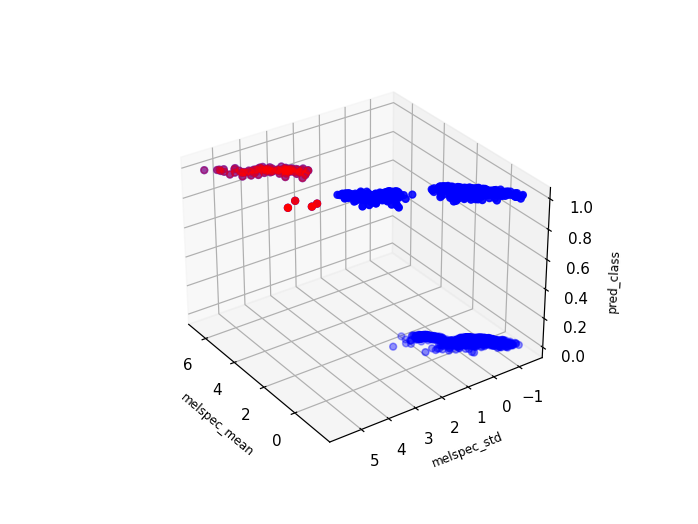

MovieWriter imagemagick unavailable; using Pillow instead.


In [69]:
#from mpl_toolkits import mplot3d
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt



fig = plt.figure()
ax = plt.axes(projection='3d')



zdata = X.iloc[:,-1]
xdata = X.iloc[:,0]
ydata = X.iloc[:,1]
ax.set_xlabel('melspec_mean', fontsize=8)
ax.set_ylabel('melspec_std', fontsize=8)
ax.set_zlabel('pred_class', fontsize=8)

ax.scatter3D(xdata, ydata, zdata,c='blue');


zdata = cluster_abnormal_df.iloc[:,-1]
xdata = cluster_abnormal_df.iloc[:,0]
ydata = cluster_abnormal_df.iloc[:,1]
ax.scatter3D(xdata, ydata, zdata,c='red');

def rotate(angle):
    ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(120, 300,1), interval=100)
rot_animation.save('slider_cluster_abnormal_normal_3D.gif', dpi=80, writer='imagemagick')


In [70]:
y_kmeans = pd.Series(y_kmeans).replace(1,0)
rand_score = metrics.rand_score(df['class'], y_kmeans)

In [71]:
rand_score = pd.DataFrame([rand_score],columns = ['rand_Score'],index = ['mel_spec_std/mel_spec_mean'])
dfi.export(rand_score, 'slider_rand_score.jpg')

In [72]:
pd.Series(y_kmeans).value_counts()


0    4010
2      84
dtype: int64